# MATH CONCEPTS MACHINE LEARNING - AASD 4001 - 100
## Final Project
## Course Facilitator:

Moe Fadaee

## Group Members: 

1. Robin Manchanda (101374905)
2. Bert Aguiar (101377891)
3. Faiz Mohammed Radhanpuri (101369631)
4. Pratiksha Murkey (101373484)

## Introduction

Capturing ratings from the reviews is important in these times where a few words have the power to start a revolution. A review, once posted, can make, or break a product – it is important to learn from previous reviews and thus direct a customer’s attention accordingly. Evaluating rating from customer’s review can benefit the organization in the following ways:
- Become more competitive
- Attract new customers
- Retain present customers
- Sell more products and services
- Reduce customer servicing
- Make customers more profitable
- Improve marketing messages and campaigns

In this project, we will be predicting the rating for a product by using review, title and other product & customer's information.

## Import Libraries

In [100]:
import pandas as pd# To work with dataframes
import numpy as np# To work with numpy arrays and algebra 
from zipfile import ZipFile# To extract the zip file
import os
import matplotlib.pyplot as plt# To plot the figures
import seaborn as sns# To plot the figures
from nltk.corpus import stopwords# To clean the text
from nltk import flatten
import re # To clean the text
import string
from wordcloud import WordCloud# To build the word clouds
from nltk.stem import WordNetLemmatizer# Text preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer# Text preprocessing
from sklearn.svm import SVC# Support vector classifier
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV # Gridsearchcv for hyper parameter tuning
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score # To evaluate the model
from sklearn.preprocessing import MinMaxScaler # Scaling dataset
import joblib # To save the trained model
import warnings
warnings.filterwarnings("ignore")

## Extracting Zip file

In [2]:
CWD = os.getcwd() # current working directory
zip_name = CWD + r'\data.zip' # zip file that contains
file_name = CWD + r'\Womens Clothing E-Commerce Reviews.csv'# data file

In [3]:
with ZipFile(zip_name, 'r') as f:
    print('Extracting zip file...')
    f.extractall() #extracting zipfile from the given path
    print('Done!!!')

Extracting zip file...
Done!!!


## Reading Data

In [4]:
orig_df = pd.read_csv(file_name) #Reading CSV file
orig_df.drop('Unnamed: 0', axis = 1, inplace=True) # Droping 'Unnamed: 0'
df = orig_df.copy()
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


### Null values

In [6]:
null_df = df.isnull().sum().sort_values(ascending = False).reset_index() #
null_df.columns = ['columns', 'null_count']

null_df.loc[null_df['null_count'] != 0]

,columns,null_count
0,Title,3810
1,Review Text,845
2,Division Name,14
3,Department Name,14
4,Class Name,14


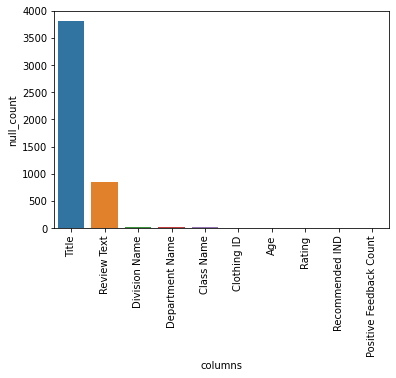

In [7]:
sns.barplot(x = null_df['columns'], y = null_df['null_count'])
plt.xticks(rotation = 90)
plt.show()

### Strategy to handle null values

In [8]:
drop_index = []
drop_index = orig_df[(orig_df['Review Text'].isnull()) & (orig_df['Title'].isnull())].index.to_list() # only those instances are dropped that have null value for both revie text and title features.
for col in orig_df.iloc[:, 7: ].columns:
#     print(col)
    drop_index.append(orig_df[(orig_df[col].isnull())].index.to_list())
drop_index = flatten(drop_index)

In [9]:
df = orig_df.drop(labels= drop_index, axis = 0).fillna('')
df.shape

(22629, 10)

- As we have seen that around 12-13% data is null in this dataset which is very large number to drop.
- We did EDA and found that most the null index is same for review text and title.
- Hence we merge review text and title column (explained in feature engineering), and dropped only that rows which have null values for both review text and title.

- By adapting this strategy we saved almost 10% of the data.

### Heatmap showing null values

<AxesSubplot:>

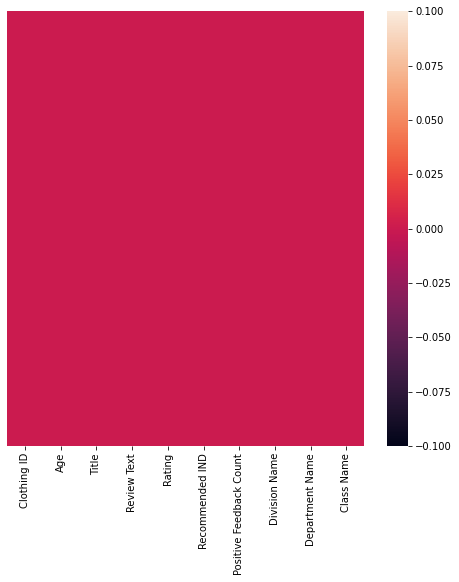

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.isnull(), yticklabels=False) # Heatmap for visualising null values

Observations:
1. There are 23486 total instances
2. Mostly the null values are in title and review text.

### Target Variable's Distribution

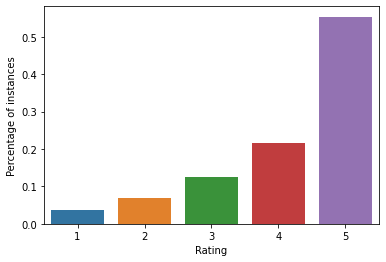

In [11]:
sns.barplot(x = 'Rating', y= 'Age', data = (df.groupby('Rating')['Age'].count() / len(df)).reset_index())
plt.ylabel('Percentage of instances')
plt.show()

Observations:
- The dataset is imbalanced.
- Around 50% of the instances belong to rating-5.
- 

### Univariate Analysis

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

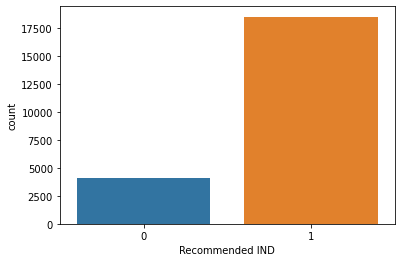

In [12]:
sns.countplot(x = df['Recommended IND'])

Observations:
- Around 80% of the products are recommended  by customers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

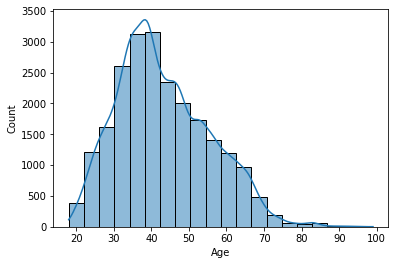

In [13]:
sns.histplot(df['Age'], bins= 20, kde=True)

<AxesSubplot:xlabel='Age'>

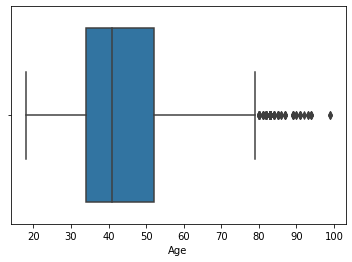

In [14]:
sns.boxplot(df['Age'])

Observations:
- Most of the customers are around 40 years old.
- 75% of the total customers are less than 52.

<AxesSubplot:xlabel='Positive Feedback Count', ylabel='Count'>

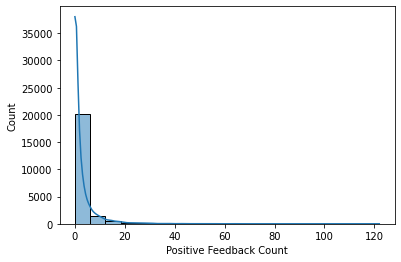

In [15]:
sns.histplot(df['Positive Feedback Count'], bins= 20, kde=True)

Observations:
- Most of the products have zero positve feedback count. 

### Bivariate Analysis

#### How the products of different divisions are rated?

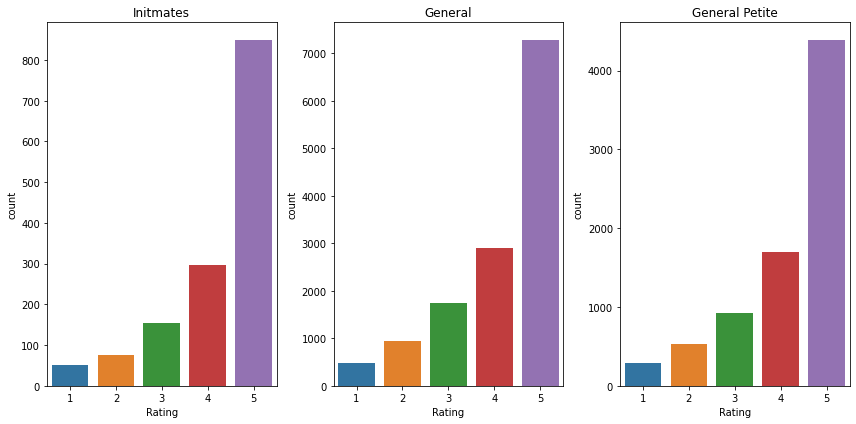

In [16]:
fig, axs = plt.subplots(1,3, figsize = (12,6))
for col, axis in zip(df['Division Name'].unique(), axs.ravel()):
    sns.countplot(x = df[df['Division Name'] == col]['Rating'], ax = axis)
    fig.tight_layout()
    axis.set_title(col)


In [17]:
df.groupby('Division Name').agg({'Rating': 'mean'})

,Rating
Division Name,
General,4.165345
General Petite,4.196631
Initmates,4.275596


Observations:
- The mean rating of every division is approximately same.

#### How the products of different Departments are rated?

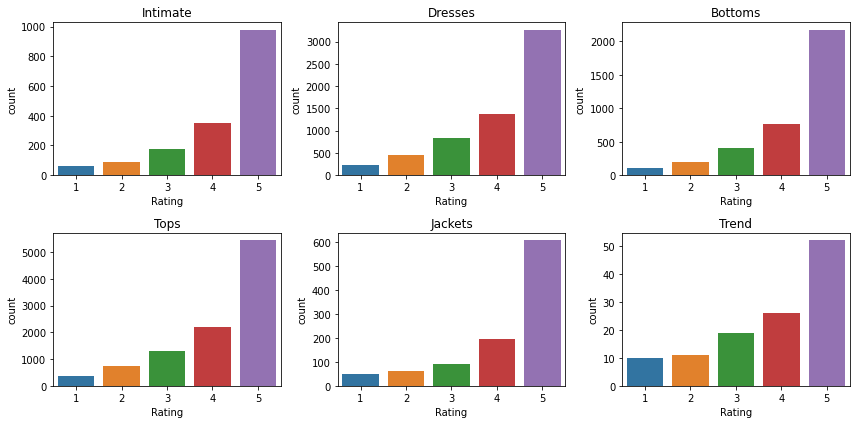

In [18]:
fig, axs = plt.subplots(2,3, figsize = (12,6))
for col, axis in zip(df['Department Name'].unique(), axs.ravel()):
    sns.countplot(x = df[df['Department Name'] == col]['Rating'], ax = axis)
    fig.tight_layout()
    axis.set_title(col)

In [19]:
df.groupby('Department Name').agg({'Rating': 'mean'})

,Rating
Department Name,
Bottoms,4.278809
Dresses,4.138952
Intimate,4.271022
Jackets,4.254491
Tops,4.157743
Trend,3.838983


Observations:
- The mean rating of every department is approximately same.
- There is a huge difference in the mean rating of Bottoms and Trend that shows people rate more Bottoms than Trend.

#### Is the rating of recommended products higher than the non-recommended?

<AxesSubplot:xlabel='Recommended IND'>

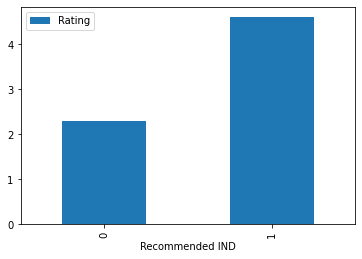

In [20]:
df.groupby('Recommended IND').agg({'Rating': 'mean'}).plot(kind = 'bar')

Observations:
- This plot shows that the product with higher recommendation tend to have more rating.

<AxesSubplot:xlabel='Class Name'>

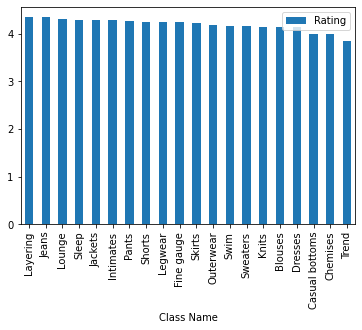

In [21]:
df.groupby('Class Name').agg({'Rating': 'mean'}).sort_values(by = 'Rating', ascending = False).plot(kind = 'bar')

#### How the rating varies with positive feedback?

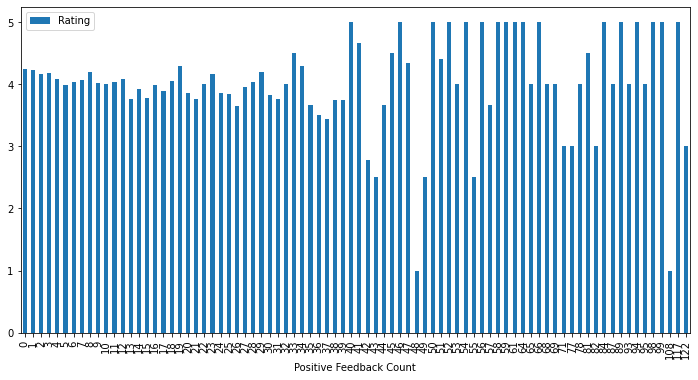

In [23]:
df.groupby('Positive Feedback Count').agg({'Rating': 'mean'}).sort_values(by = 'Positive Feedback Count', ascending = True).plot(kind = 'bar', figsize=(12, 6))
plt.show()

Observations:
- It can be clearly seen from the plot that the products with higher positive feedback counts have mostly higher ratings.

#### Do younger customer rate less or more than the older ones?

<AxesSubplot:xlabel='Rating', ylabel='Age'>

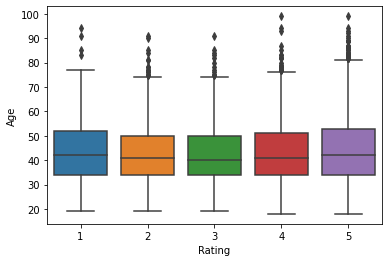

In [25]:
sns.boxplot(data = df, y = 'Age', x = 'Rating')

### Correlation

<AxesSubplot:>

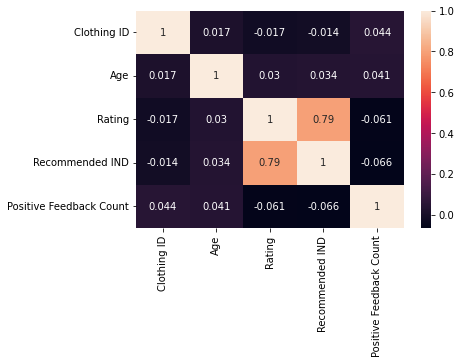

In [26]:
sns.heatmap(df.corr(), annot = True)

## Feature Engineering

Two more features are created:
- Review Text_len
- Title_len

In [28]:
df['Review Text_len'] = df['Review Text'].apply(lambda x :0 if type(x) != str else len(x.split(" ")))
df['Title_len'] = df['Title'].apply(lambda x :0 if type(x) != str else len(x.split(" ")))
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text_len,Title_len
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,1
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,67,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,4
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,3
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,2


<AxesSubplot:xlabel='Review Text_len', ylabel='Count'>

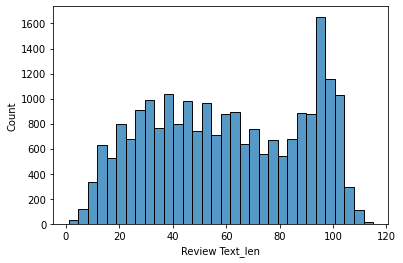

In [29]:
sns.histplot(x = df['Review Text_len'])

<AxesSubplot:xlabel='Review Text_len'>

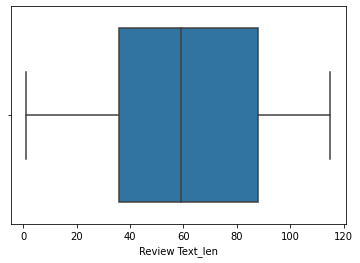

In [30]:
sns.boxplot(x = df['Review Text_len'])

Observations:
- 'Review Text_len' has a bimodal gaussian distribution.

<AxesSubplot:xlabel='Rating', ylabel='Review Text_len'>

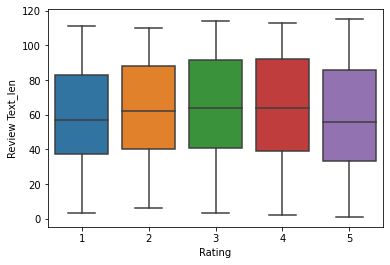

In [31]:
sns.boxplot(x = df['Rating'], y = df['Review Text_len'])

Observations:
- Five-stars and one-star reviews seem to have smaller mean length than the others.

<AxesSubplot:xlabel='Title_len', ylabel='Count'>

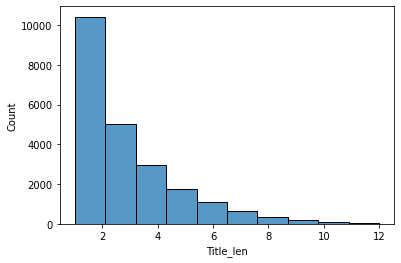

In [32]:
sns.histplot(x = df['Title_len'], bins = 10)

<AxesSubplot:xlabel='Rating', ylabel='Title_len'>

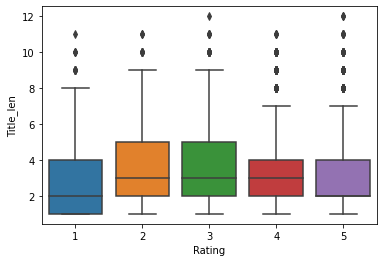

In [33]:
sns.boxplot(x = df['Rating'], y = df['Title_len'])

Observations:
- Five-stars and one-star reviews seem to have smaller mean length than the others.

## Text Preprocessing

In [34]:
stop_words = stopwords.words('english') #English language's stop words
lemmetizer = WordNetLemmatizer() #lemmetization

def textpreprocess(s):
    """This function cleans the text
    Input: string to be cleaned
    Return: string after cleaning
    """
    words = [] # empty list
    
    s = s.strip().lower() # lower the string
    s = re.sub('\[.*?\]', '', s) # removes symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)
    
    words = s.split() # split the string into list of words
    words = [lemmetizer.lemmatize(word) for word in words if word not in stop_words] # removing stop words and applying lemmetization
    s = ' '.join(words) # converting list to string
    
    return s

In [35]:
df['Review Text_clean'] = df['Review Text'].dropna().apply(textpreprocess)
df['Title_clean'] = df['Title'].dropna().apply(textpreprocess)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text_len,Title_len,Review Text_clean,Title_clean
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,1,absolutely wonderful silky sexy comfortable,
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,67,1,love dress sooo pretty happened find store im ...,
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,4,high hope dress really wanted work initially o...,major design flaw
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,3,love love love jumpsuit fun flirty fabulous ev...,favorite buy
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,2,shirt flattering due adjustable front tie perf...,flattering shirt


In [36]:
df[['Review Text', 'Review Text_clean', 'Title', 'Title_clean']].head()

,Review Text,Review Text_clean,Title,Title_clean
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,,
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store im ...,,
2,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...,Some major design flaws,major design flaw
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,My favorite buy!,favorite buy
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,Flattering shirt,flattering shirt


## Splitting dataframe with respect to the rating

For example, df_1 is the dataframe that has instance with rating =1

In [37]:
df_dict = {}
for i in range(1, 6):
    
    df_dict[f'df_{i}'] = df.loc[df['Rating'] == i]

In [38]:
df_dict['df_1'].head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text_len,Title_len,Review Text_clean,Title_clean
61,368,36,Itchy tags,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,0,Initmates,Intimate,Intimates,103,2,tag sewn small long huge x itchy cut thread le...,itchy tag
85,866,58,,"I was really hoping to like this, but it did n...",1,0,2,General Petite,Tops,Knits,102,1,really hoping like look way model least sharkb...,
96,845,44,,I usually wear a medium and bought a small. it...,1,0,0,General Petite,Tops,Blouses,49,1,usually wear medium bought small fit ok shape ...,
97,861,44,Huge,I was very excited to order this top in red xs...,1,0,0,General Petite,Tops,Knits,32,1,excited order top red x cute huge shapeless su...,huge
110,861,44,Poor quality,This is so thin and poor quality. especially f...,1,0,11,General Petite,Tops,Knits,32,2,thin poor quality especially price felt like t...,poor quality


In [39]:
def multi_kde_plot(dfs, feature):
    """This function plots multiple distributions in a single plot.
    Input: DataFrame list
    Return: Nothing
    """
    plt.figure(figsize= (12, 6))
    for i, d in enumerate(dfs):
        sns.kdeplot(x = feature, data =df_dict[d], label = f'Rating_{i}', shade=True)
    
    plt.legend()
    plt.show()

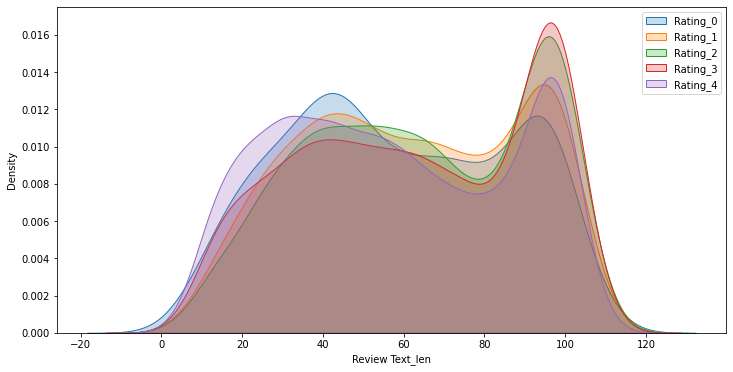

In [40]:
multi_kde_plot(df_dict.keys(), 'Review Text_len')

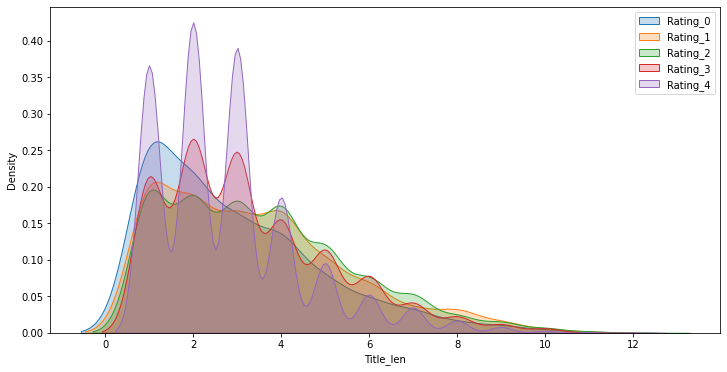

In [41]:
multi_kde_plot(df_dict.keys(), 'Title_len')

## Word Cloud

In [42]:
def top_words(df_tmp, feature, num_top = 20):
    """This function finds the frequent words in a dataframe for a given feature
    Input:
    1. Dataframe,
    2. feature,
    3. num_top: how many top frequent words you want
    
    Return: A datframe with words and their count"""
    
    words = []
    top_words_df = pd.Series([], dtype= 'object') # creating empty data series
    
    df_tmp[feature].dropna().apply(lambda x: words.append(x.strip().split()))
        
    words = list(np.concatenate(words).flat) # list containg all words
    top_words_df = pd.DataFrame(words).value_counts().rename_axis('words')[:num_top].reset_index(name = 'count')
    
    return top_words_df

In [43]:
top_review = {}

for i in range(1, 6):
    top_review[f'top_{i}'] = top_words(df_dict[f'df_{i}'], 'Review Text_clean')

In [44]:
def plot_wordcloud(df_tmp):
    """This function plots word cloud
    Input: Dataframe with words and their count
    Returns: Nothing"""
    
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df_tmp['words'].tolist()))
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

				Word cloud for Rating 1


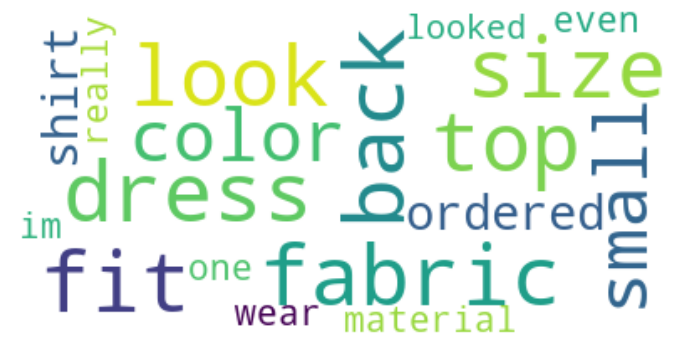

				Word cloud for Rating 2


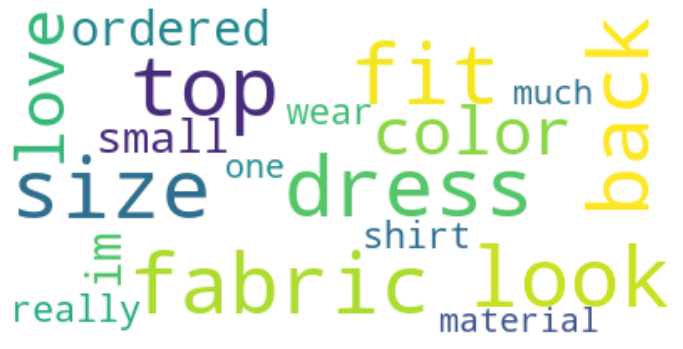

				Word cloud for Rating 3


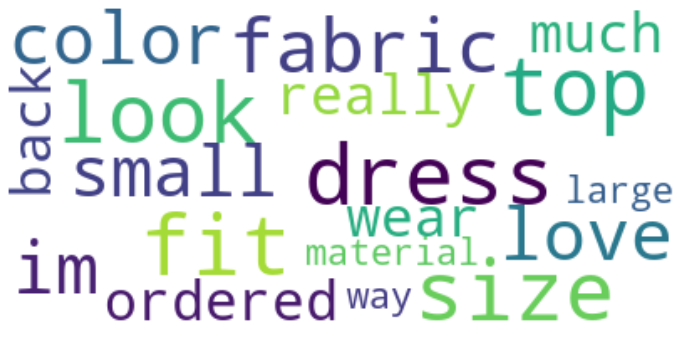

				Word cloud for Rating 4


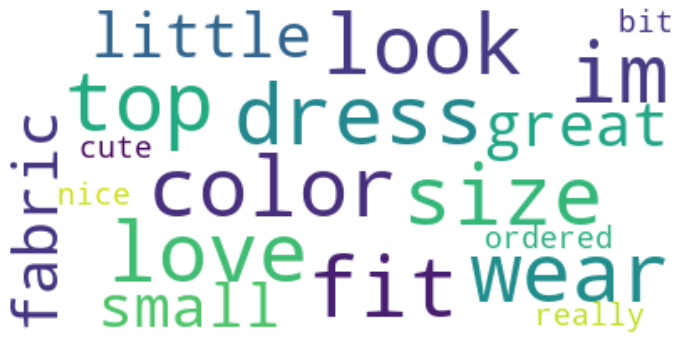

				Word cloud for Rating 5


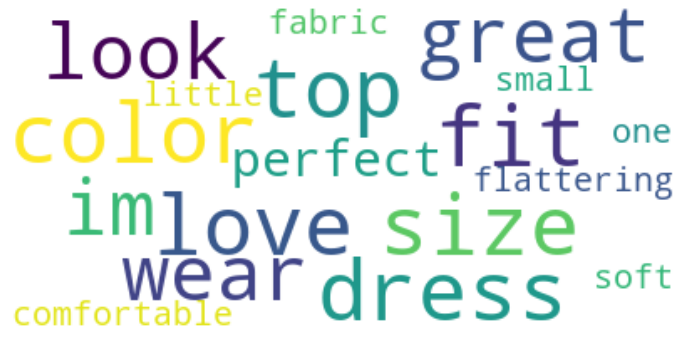

In [45]:
for k in top_review.keys():
    i = k.split('_')[1]
    print(f'\t\t\t\tWord cloud for Rating {i}')
    plot_wordcloud(top_review[k])

In [46]:
top_title = {}

for i in range(1, 6):
    top_title[f'top_{i}'] = top_words(df_dict[f'df_{i}'], 'Title_clean')

				Word cloud for Rating 1


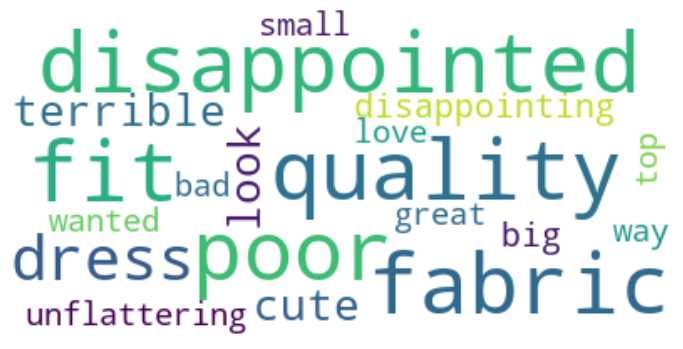

				Word cloud for Rating 2


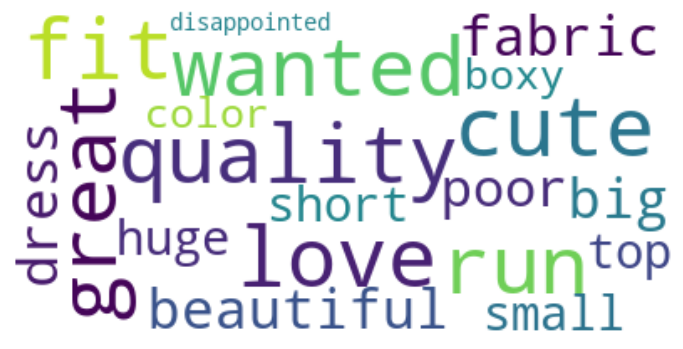

				Word cloud for Rating 3


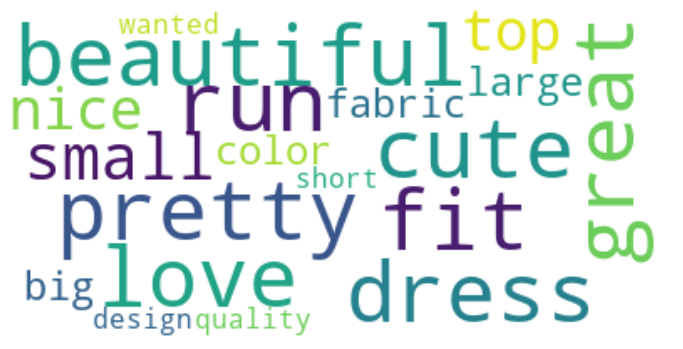

				Word cloud for Rating 4


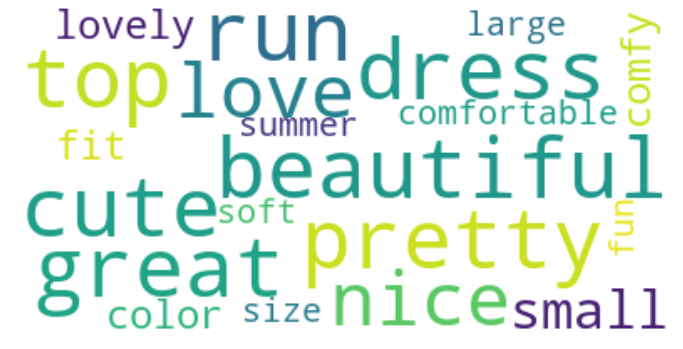

				Word cloud for Rating 5


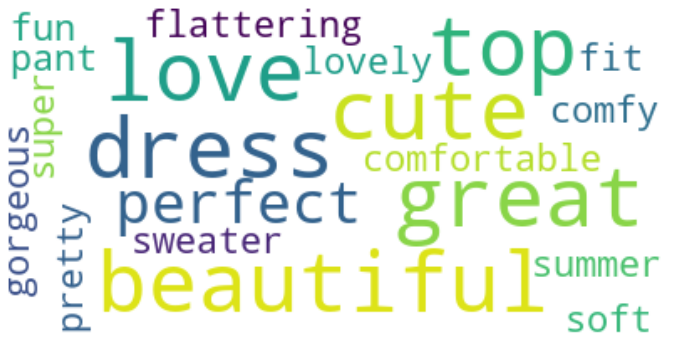

In [47]:
for k in top_title.keys():
    i = k.split('_')[1]
    print(f'\t\t\t\tWord cloud for Rating {i}')
    plot_wordcloud(top_title[k])

## Merging Review and Title features

In [48]:
df['Review + Title'] = df['Review Text_clean'] + df['Title_clean']
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text_len,Title_len,Review Text_clean,Title_clean,Review + Title
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,1,absolutely wonderful silky sexy comfortable,,absolutely wonderful silky sexy comfortable
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,67,1,love dress sooo pretty happened find store im ...,,love dress sooo pretty happened find store im ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,4,high hope dress really wanted work initially o...,major design flaw,high hope dress really wanted work initially o...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,3,love love love jumpsuit fun flirty fabulous ev...,favorite buy,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,2,shirt flattering due adjustable front tie perf...,flattering shirt,shirt flattering due adjustable front tie perf...


In [49]:
corpus = df['Review + Title'].to_list()

## Extracting features from text

- Our dataset consists of texts in the English language which can be easily understood by humans, but we need to convert these texts into some suitable form that can be understood by the machines.
- There are different methods/techniques available to perform this task such as the bag of words, tf-idf, word embeddings, etc.
- For this project, we will be trying both bag of words, and tf-idf.

### Bag of Words

In [50]:
bow = CountVectorizer(max_features=10000)
X_text = bow.fit_transform(corpus).toarray()

In [51]:
df_text = pd.DataFrame(X_text, columns= bow.get_feature_names())
df_text.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abovetheknee,abroad,...,zig,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_other = df[['Age',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name']]
df_other.head()

,Age,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,1,0,Initmates,Intimate,Intimates
1,34,1,4,General,Dresses,Dresses
2,60,0,0,General,Dresses,Dresses
3,50,1,0,General Petite,Bottoms,Pants
4,47,1,6,General,Tops,Blouses


In [53]:
df_other = pd.get_dummies(df_other, drop_first= True).reset_index().drop('index', axis =1) # One hot encoding
df_other.head()

,Age,Recommended IND,Positive Feedback Count,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,33,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,1,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,47,1,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_other[['Age', 'Positive Feedback Count']] = MinMaxScaler().fit_transform(df_other[['Age', 'Positive Feedback Count']].values) # Scaling

In [55]:
df_other.head()

,Age,Recommended IND,Positive Feedback Count,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,0.185185,1,0.000000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.197531,1,0.032787,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.518519,0,0.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.395062,1,0.000000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.358025,1,0.049180,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting data into Independent and Dependent features

In [56]:
X = pd.concat([df_other, df_text], axis = 1)

In [57]:
y = df['Rating']

In [58]:
any(X.isnull().sum() > 0)

False

In [59]:
X.shape[0] == df_other.shape[0] == df_text.shape[0] == y.shape[0] # sanity check

True

## Feature Extraction

### PCA

As there are large number of features, PCA has been tried to extract the small numer of features with 90% variation.

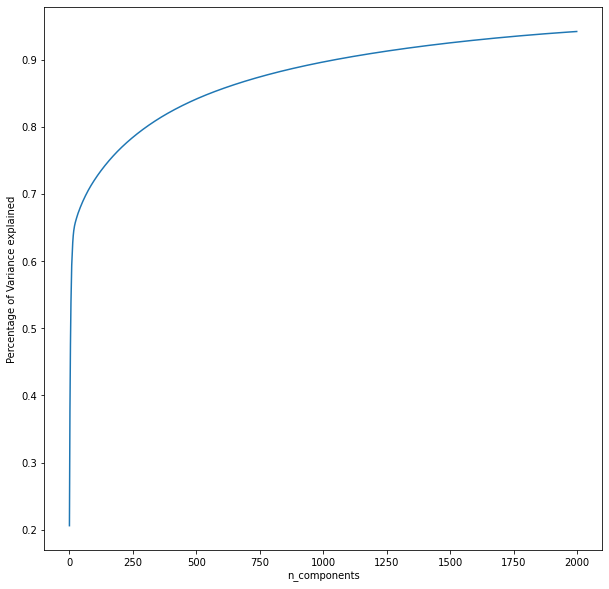

In [163]:
# pca = PCA().fit(X, y)
plt.figure(figsize = (10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Percentage of Variance explained')
plt.show()

In [109]:
pca = PCA(n_components= 2000)
X_pca = pca.fit_transform(X)
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)
print(f'Shape of X_train: {X_pca_train.shape} \nShape of X_test: {X_pca_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}')

Shape of X_train: (18103, 2000) 
Shape of X_test: (4526, 2000)
Shape of y_train: (18103,)
Shape of y_test: (4526,)


In [ ]:
rf_tmp = RandomForestClassifier(n_estimators=100, max_depth=16)
rf_tmp.fit(X_pca_train, y_train)

In [137]:
pred = rf_tmp.predict(X_pca_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       164
           2       0.35      0.05      0.09       310
           3       0.46      0.15      0.22       564
           4       0.00      0.00      0.00       982
           5       0.58      1.00      0.74      2506

    accuracy                           0.58      4526
   macro avg       0.28      0.24      0.21      4526
weighted avg       0.40      0.58      0.44      4526



The result of using PCA is not so great, so we dropped the idea of extracting the features.

## Splitting dataset into train and test dataset

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [61]:
print(f'Shape of X_train: {X_train.shape} \nShape of X_test: {X_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}')

Shape of X_train: (18103, 10029) 
Shape of X_test: (4526, 10029)
Shape of y_train: (18103,)
Shape of y_test: (4526,)


## Modeling Approaches

- Logistic Regression

- Support Vector Classifier

- Random Forest Classification


In [156]:
def print_result(result):
    """This function helps in printing the result of hyperparameter tuning by the model_build function."""
    
    print(f'BEST PARAMETERS: {result.best_params_}')
    means = result.cv_results_['mean_test_score']
    stds = result.cv_results_['std_test_score']
    params = result.cv_results_['params']
    i=0
    for p, m, s in zip(params, means, stds):
        # print(p, f'Mean: {m}', f'Std: {s}')
        i+=1

In [ ]:
def model_build(train_fr, train_labels, model, param_dic, cv_steps):
    """This function helps in hyperparameter tuning by using 
    gridsearchcv for a given model and hyperparameters."""
    
    cv = GridSearchCV(model, param_dic, cv = cv_steps, scoring = 'f1_weighted')
    cv.fit(train_fr, train_labels)
    print_result(cv) 
    return cv.best_estimator_

In [64]:
def model_save(model, name):
    """This function helps in saving the model"""
    
    joblib.dump(model, f'{name}.pkl')

### Building model and hyper parameter tuning

#### Logistic Regression

In [65]:
lr = model_build(X_train, y_train,
            model = LogisticRegression(),
            param_dic={'C': [0.01, 0.1, 1, 10, 100]},
            cv_steps=3)

BEST PARAMETERS: {'C': 0.1}
{'C': 0.01} Mean: 0.6580673797573668 Std: 0.004419892827935599
{'C': 0.1} Mean: 0.6627076502964834 Std: 0.006360080333502061
{'C': 1} Mean: 0.6402805257915721 Std: 0.004679345875816676
{'C': 10} Mean: 0.614594340072554 Std: 0.004498437667891761
{'C': 100} Mean: 0.6009503634792697 Std: 0.004761431101093729


In [66]:
model_save(lr, 'lr_bow')

#### Support Vector Machine

In [67]:
svc = model_build(X_train, y_train,
            model = SVC(),
            param_dic={'C' : [0.1, 1, 10, 100], 'kernel' : ['linear', 'rbf']},
            cv_steps=3)
model_save(svc, 'svc_bow')

#### Random Forest

In [68]:
rf = model_build(X_train, y_train,
            model = RandomForestClassifier(),
            param_dic={'n_estimators': [10, 50, 100, 250, 500], 'max_depth': [4, 8, 16, 32, 64, None]},
            cv_steps=3)

BEST PARAMETERS: {'max_depth': None, 'n_estimators': 100}
{'max_depth': 4, 'n_estimators': 10} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 50} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 100} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 250} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 500} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 10} Mean: 0.553665141753574 Std: 0.00014205980498810725
{'max_depth': 8, 'n_estimators': 50} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 100} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 250} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 500} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 16, 'n_estimators': 10} Mean: 0.

In [69]:
model_save(rf, 'rf_bow')

### TFIDF 

In [70]:
tfidf = TfidfVectorizer(max_features=10000)
X_text = tfidf.fit_transform(corpus)
df_text = pd.DataFrame(X_text.toarray(), columns= tfidf.get_feature_names())
X = pd.concat([df_other, df_text], axis = 1)
X.head()

,Age,Recommended IND,Positive Feedback Count,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,zig,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.185185,1,0.000000,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.197531,1,0.032787,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.518519,0,0.000000,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.136241,0.0,0.118803,0.0,0.0,0.0,0.0
3,0.395062,1,0.000000,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.358025,1,0.049180,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print(f'Shape of X_train: {X_train.shape} \nShape of X_test: {X_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}')

Shape of X_train: (18103, 10029) 
Shape of X_test: (4526, 10029)
Shape of y_train: (18103,)
Shape of y_test: (4526,)


#### Logistic Regression

In [72]:
lr = model_build(X_train, y_train,
            model = LogisticRegression(),
            param_dic={'C': [0.01, 0.1, 1, 10, 100, 1000]},
            cv_steps=3)
model_save(lr, 'lr_tfidf')

BEST PARAMETERS: {'C': 1}
{'C': 0.01} Mean: 0.6254763648539706 Std: 0.001451301931358061
{'C': 0.1} Mean: 0.6420480574177974 Std: 0.005874234876009082
{'C': 1} Mean: 0.667347518073273 Std: 0.006518721183645106
{'C': 10} Mean: 0.6486766465679111 Std: 0.00550459297930505
{'C': 100} Mean: 0.633320380863041 Std: 0.004272246437671623
{'C': 1000} Mean: 0.6272990840726997 Std: 0.006115248614433982


#### Support Vector Machine

In [ ]:
svc = model_build(X_train, y_train,
            model = SVC(),
            param_dic={'C' : [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
            cv_steps=3)
model_save(svc, 'svc_tfidf')

#### Random Forest

In [73]:
rf = model_build(X_train, y_train,
            model = RandomForestClassifier(),
            param_dic={'n_estimators': [50, 100, 250, 500, 1000], 'max_depth': [4, 8, 16, 32, 64]},
            cv_steps=3)
model_save(rf, 'rf_tfidf')

BEST PARAMETERS: {'max_depth': None, 'n_estimators': 250}
{'max_depth': 4, 'n_estimators': 50} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 100} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 250} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 500} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 4, 'n_estimators': 1000} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 50} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 100} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 250} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 500} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 8, 'n_estimators': 1000} Mean: 0.5536098992389348 Std: 6.778746761164655e-05
{'max_depth': 16, 'n_estimators': 50} Mean

## Model Evaluation

- Accuracy Score
- Precision Score
- Recall Score
- F1-score
- Classification Report
- Confusion Matrix


As the data is highly imbalanced, precision, recall, and f1-score are also considered.

In [76]:
def model_load(fname):
    """This function helps in loading the saved model."""
    
    model = joblib.load(fname)
    
    return model

In [77]:
def model_evaluate(model, X_test, y_true):
    """This function returns the accuracy, precision, recall,
    classifictaion report, confusion matrix, and f1-score for a given model."""
    
    pred = model.predict(X_test)
    acc = accuracy_score(y_true, pred)
    rcl = recall_score(y_true, pred, average='weighted')
    prc = precision_score(y_true, pred, average='weighted') 
    rprt = classification_report(y_true, pred)
    c_matrix = confusion_matrix(y_true, pred)
    f1 = f1_score(y_true, pred, average='weighted')
    
    return acc, prc, rcl, rprt, c_matrix, f1

In [157]:
# lr_bow = model_load('lr_bow.pkl')
# rf_bow = model_load('rf_bow.pkl')
# lr_tfidf = model_load('lr_tfidf.pkl')
# rf_tfidf = model_load('rf_tfidf.pkl')
accuracy = []
precision = []
f1_sc = []
recall = []

### Classification report and Confusion Matrix

#### Logistic Regression with TF-IDF approach

In [143]:
a, p, rl, r, cm, f = model_evaluate(lr_tfidf, X_test, y_test)
print(f'Classification Report:\n {r}\nConfusion Matrix:\n {cm}')
# accuracy.append(a)
# precision.append(p)
# f1_sc.append(f)
# recall.append(rl)

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.46      0.58       164
           2       0.64      0.62      0.63       310
           3       0.64      0.54      0.59       564
           4       0.64      0.45      0.53       982
           5       0.80      0.95      0.87      2506

    accuracy                           0.75      4526
   macro avg       0.70      0.60      0.64      4526
weighted avg       0.74      0.75      0.73      4526

Confusion Matrix:
 [[  75   42   44    1    2]
 [   8  193   96    8    5]
 [  11   51  306  117   79]
 [   0   12   28  439  503]
 [   1    2    5  120 2378]]


#### Random Forest with TF-IDF approach

In [142]:
a, p, rl, r, cm, f = model_evaluate(rf_tfidf, X_test, y_test)
print(f'Classification Report:\n {r}\nConfusion Matrix:\n {cm}')
# accuracy.append(a)
# precision.append(p)
# f1_sc.append(f)
# recall.append(rl)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.81      0.90       164
           2       0.94      0.83      0.88       310
           3       0.88      0.91      0.89       564
           4       0.99      0.80      0.89       982
           5       0.91      1.00      0.95      2506

    accuracy                           0.93      4526
   macro avg       0.94      0.87      0.90      4526
weighted avg       0.93      0.93      0.93      4526

Confusion Matrix:
 [[ 133   10   19    0    2]
 [   0  256   50    0    4]
 [   0    6  515    3   40]
 [   0    0    4  788  190]
 [   0    0    0    3 2503]]


- (190) 5 stars, being predicted as 4 stars

- (50) 3 stars being predicted as 2 stars

- There are some other mispredictions but a lower amount.

## Results 

For better understanding and comparison, a table has been created with index as model name and features as evaluation metrics.


In [158]:
for m in [lr_bow, lr_tfidf, rf_bow, rf_tfidf, clf]:
    
    a, p, rl, r, cm, f = model_evaluate(m, X_test, y_test)
    accuracy.append(a)
    precision.append(p)
    f1_sc.append(f)
    recall.append(rl)
    
df_result = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1-score': f1_sc}, index = ['lr_bow', 'lr_tfidf', 'rf_bow', 'rf_tfidf', 'NN_tfidf'])
df_result.head()

,Accuracy,Precision,Recall,f1-score
lr_bow,0.669244,0.675222,0.669244,0.576420
lr_tfidf,0.749227,0.735100,0.749227,0.732875
rf_bow,0.617985,0.674170,0.617985,0.509966
rf_tfidf,0.926867,0.931153,0.926867,0.925119
NN_tfidf,0.706142,0.665930,0.706142,0.681674


Note: Some abbreviations  are used to concise the table.
- bow: Bag of Words
- tfidf: TF-IDF
- lr: Logistic regression
- svm: Support vector machine
- rf: Random forest

## Conclusion

- Random Forest classifier with TF-IDF vectorizer outperforms the other classifiers.
- Stratify split provides the better results than the non-stratify.

## References:
1. The data is acquired from the following source:
- Kaggle: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews  